In [139]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
# Configure Notebook

sns.set_context("notebook") 
import warnings 
warnings.filterwarnings('ignore')

In [140]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300 # increase resolution

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# Reading Data



## Import Notebook 
First import notebook from previously exported raw data file

In [141]:
trips_data = pd.read_csv('trips_raw_data.csv')
trips_data.head()

,Unnamed: 0,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,...,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Weather
0,58,712441,NaN,274,7006.0,2017-01-01 00:03:00-05:00,Bay St / College St (East Side),7021.0,2017-01-01 00:08:00-05:00,Bay St / Albert St,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
1,59,712442,NaN,538,7046.0,2017-01-01 00:03:00-05:00,Niagara St / Richmond St W,7147.0,2017-01-01 00:12:00-05:00,King St W / Fraser Ave,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
2,60,712443,NaN,992,7048.0,2017-01-01 00:05:00-05:00,Front St W / Yonge St (Hockey Hall of Fame),7089.0,2017-01-01 00:22:00-05:00,Church St / Wood St,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
3,61,712444,NaN,1005,7177.0,2017-01-01 00:09:00-05:00,East Liberty St / Pirandello St,7202.0,2017-01-01 00:26:00-05:00,Queen St W / York St (City Hall),...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
4,62,712445,NaN,645,7203.0,2017-01-01 00:14:00-05:00,Bathurst St/Queens Quay(Billy Bishop Airport),7010.0,2017-01-01 00:25:00-05:00,King St W / Spadina Ave,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN


In [142]:
trips_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8039088 entries, 0 to 8039087
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   Trip Id              int64  
 2   Subscription Id      float64
 3   Trip Duration        int64  
 4   Start Station Id     float64
 5   Start Time           object 
 6   Start Station Name   object 
 7   End Station Id       float64
 8   End Time             object 
 9   End Station Name     object 
 10  Bike Id              float64
 11  User Type            object 
 12  merge_time           object 
 13  Date/Time            object 
 14  Temp (°C)            float64
 15  Dew Point Temp (°C)  float64
 16  Rel Hum (%)          float64
 17  Wind Dir (10s deg)   float64
 18  Wind Spd (km/h)      float64
 19  Visibility (km)      float64
 20  Stn Press (kPa)      float64
 21  Hmdx                 float64
 22  Wind Chill           float64
 23  Weather              object 
dty

## Setting Datetime
Converting Start Time and End Time to Datetime instead of object

In [143]:
trips_data['Start Time'] = pd.DatetimeIndex(trips_data['Start Time']).tz_convert(tz = 'EST')
trips_data['End Time'] = pd.DatetimeIndex(trips_data['End Time']).tz_convert(tz = 'EST')

In [144]:
trips_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8039088 entries, 0 to 8039087
Data columns (total 24 columns):
 #   Column               Dtype              
---  ------               -----              
 0   Unnamed: 0           int64              
 1   Trip Id              int64              
 2   Subscription Id      float64            
 3   Trip Duration        int64              
 4   Start Station Id     float64            
 5   Start Time           datetime64[ns, EST]
 6   Start Station Name   object             
 7   End Station Id       float64            
 8   End Time             datetime64[ns, EST]
 9   End Station Name     object             
 10  Bike Id              float64            
 11  User Type            object             
 12  merge_time           object             
 13  Date/Time            object             
 14  Temp (°C)            float64            
 15  Dew Point Temp (°C)  float64            
 16  Rel Hum (%)          float64            
 17  Wind Dir

In [145]:
trips_data.head()

,Unnamed: 0,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,...,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Weather
0,58,712441,NaN,274,7006.0,2017-01-01 00:03:00-05:00,Bay St / College St (East Side),7021.0,2017-01-01 00:08:00-05:00,Bay St / Albert St,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
1,59,712442,NaN,538,7046.0,2017-01-01 00:03:00-05:00,Niagara St / Richmond St W,7147.0,2017-01-01 00:12:00-05:00,King St W / Fraser Ave,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
2,60,712443,NaN,992,7048.0,2017-01-01 00:05:00-05:00,Front St W / Yonge St (Hockey Hall of Fame),7089.0,2017-01-01 00:22:00-05:00,Church St / Wood St,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
3,61,712444,NaN,1005,7177.0,2017-01-01 00:09:00-05:00,East Liberty St / Pirandello St,7202.0,2017-01-01 00:26:00-05:00,Queen St W / York St (City Hall),...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
4,62,712445,NaN,645,7203.0,2017-01-01 00:14:00-05:00,Bathurst St/Queens Quay(Billy Bishop Airport),7010.0,2017-01-01 00:25:00-05:00,King St W / Spadina Ave,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN


Since before 2018 user data is incomplete, we will exclude data before 2018 from Start Time 

In [146]:
trips_data = trips_data[trips_data['Start Time']>'2018-01-01']
trips_data.head()

,Unnamed: 0,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,...,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Weather
1392031,1392089,2383648,NaN,393,7018.0,2018-01-01 00:47:00-05:00,Bremner Blvd / Rees St,7176.0,2018-01-01 00:54:00-05:00,Bathurst St / Fort York Blvd,...,-16.8,-21.1,70.0,NaN,4.0,16.1,102.1,NaN,-20.0,NaN
1392032,1392090,2383649,NaN,625,7184.0,2018-01-01 00:52:00-05:00,Ossington Ave / College St,7191.0,2018-01-01 01:03:00-05:00,Central Tech (Harbord St),...,-16.8,-21.1,70.0,NaN,4.0,16.1,102.1,NaN,-20.0,NaN
1392033,1392091,2383650,NaN,233,7235.0,2018-01-01 00:55:00-05:00,Bay St / College St (West Side) - SMART,7021.0,2018-01-01 00:59:00-05:00,Bay St / Albert St,...,-16.8,-21.1,70.0,NaN,4.0,16.1,102.1,NaN,-20.0,NaN
1392034,1392092,2383651,NaN,1138,7202.0,2018-01-01 00:57:00-05:00,Queen St W / York St (City Hall),7020.0,2018-01-01 01:16:00-05:00,Phoebe St / Spadina Ave,...,-16.8,-21.1,70.0,NaN,4.0,16.1,102.1,NaN,-20.0,NaN
1392035,1392093,2383652,NaN,703,7004.0,2018-01-01 01:00:00-05:00,University Ave / Elm St,7060.0,2018-01-01 01:12:00-05:00,Princess St / Adelaide St E,...,-16.8,-21.1,70.0,NaN,4.0,16.1,102.1,NaN,-20.0,NaN


# User Analysis 

## General Analysis without Weather factors 
In this section, casual and annual members are compared regardless of the weather conditions to provide a general overview and behaviour differences with a Frequency of Days

In [147]:
trips_data_day = trips_data
trips_data_day=trips_data_day.groupby([pd.Grouper(key='Start Time', freq='D')]).agg(
    rides=pd.NamedAgg(column='User Type', aggfunc=lambda x: (x.count())),
    annual_members = pd.NamedAgg(column='User Type', aggfunc=lambda x: (x[x=='Annual Member'].count())),
    casual_members = pd.NamedAgg(column='User Type', aggfunc=lambda x: (x[x=='Casual Member'].count())))

trips_data_day['rides'] = trips_data_day['rides'].astype('Int64')
trips_data_day['annual_members'] = trips_data_day['annual_members'].astype('Int64')
trips_data_day['casual_members'] = trips_data_day['casual_members'].astype('Int64')
trips_data_day.head()

,rides,annual_members,casual_members
Start Time,,,
2018-01-01 00:00:00-05:00,243,235,8
2018-01-02 00:00:00-05:00,953,934,19
2018-01-03 00:00:00-05:00,1181,1166,15
2018-01-04 00:00:00-05:00,1169,1153,16
2018-01-05 00:00:00-05:00,783,773,10


Adding workday indicator

In [148]:
trips_data_day['workday'] = np.where((trips_data_day.index.dayofweek) < 5,'True','False')
trips_data_day = trips_data_day.dropna()
trips_data_day.head()

,rides,annual_members,casual_members,workday
Start Time,,,,
2018-01-01 00:00:00-05:00,243,235,8,True
2018-01-02 00:00:00-05:00,953,934,19,True
2018-01-03 00:00:00-05:00,1181,1166,15,True
2018-01-04 00:00:00-05:00,1169,1153,16,True
2018-01-05 00:00:00-05:00,783,773,10,True


## Plotting Graph to compare workday vs non workday behaviour 

First, a hue semantic to show distrubtion 

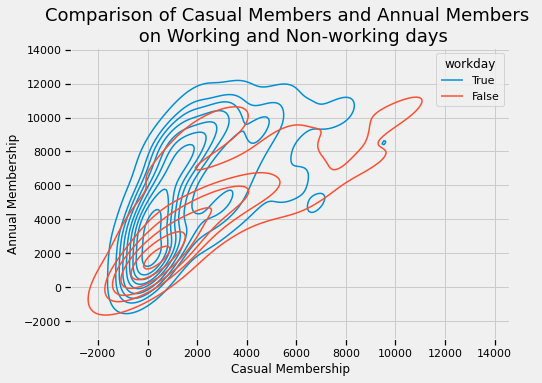

In [149]:
import matplotlib.patches as  mpatches
plt.figure(figsize=(7, 5))
trips_data_day['casual_members']=trips_data_day['casual_members'].astype('float64')
trips_data_day['annual_members']=trips_data_day['annual_members'].astype('float64')
plt.title('Comparison of Casual Members and Annual Members \n on Working and Non-working days', fontsize=18)
ax=sns.kdeplot(data=trips_data_day, x="casual_members", y="annual_members", hue="workday")
ax.set_xlabel('Casual Membership',fontsize=12)
ax.set_ylabel('Annual Membership',fontsize=12)
plt.show()

Combining with scatter plot to show distribution

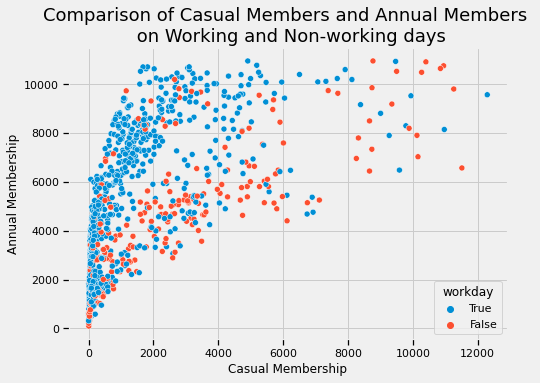

In [150]:
plt.figure(figsize=(7, 5))
plt.title('Comparison of Casual Members and Annual Members \n on Working and Non-working days', fontsize=18)
bx=sns.scatterplot(data=trips_data_day, x="casual_members", y="annual_members",hue="workday")
handles, labels = ax.get_legend_handles_labels()
bx.legend( title='workday')
bx.set_xlabel('Casual Membership',fontsize=12)
bx.set_ylabel('Annual Membership',fontsize=12)
plt.show()

Adding violin plot to further illustrate the distribution for both annual and casual members

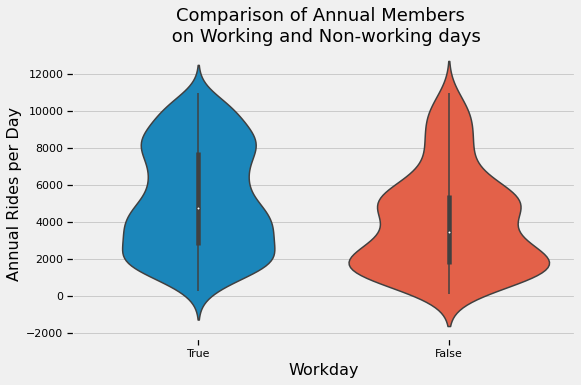

In [151]:
plt.figure(figsize=(8, 5))
plt.title('Comparison of Annual Members \n on Working and Non-working days', fontsize=18)
cx1 = sns.violinplot(x="workday", y="annual_members", data=trips_data_day)
cx1.set_xlabel('Workday',fontsize=16)
cx1.set_ylabel('Annual Rides per Day',fontsize=16)
plt.show()

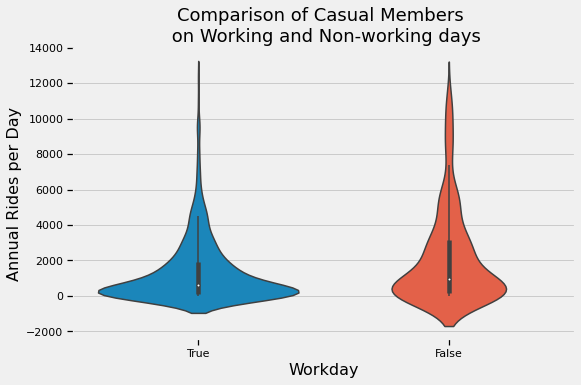

In [152]:
plt.figure(figsize=(8, 5))
plt.title('Comparison of Casual Members \n on Working and Non-working days', fontsize=18)
cx2 = sns.violinplot(x="workday", y="casual_members", data=trips_data_day)
cx2.set_xlabel('Workday',fontsize=16)
cx2.set_ylabel('Annual Rides per Day',fontsize=16)
plt.show()

From the first two graphs above, it is evident that there are more annual membership users utilizing the bike share service on weekdays, suggesting that these users are using the service for possible commuting to and from work. 
On the contrary, for casual members, the patterns are more spread out with a higher usage during the weekends, suggesting that casual users are utilizing the service for possible leisure purposes without specific pattern. 

This is further demonstrated through the violin plot distribution graphs, where it is evident to see that for weekdays, annual membership users have a more even distributed rides per day in comparsion to casual members suggesting that casual members are less likely to use this service on weekdays. However, the probability for casual members to use the bike share service increased for week-ends, comparing to annual users where weekday and weekend showed less variations in the probability of ridership. 

However, in order to further justify the assumption that annual users are utilizing for commuting purposes, hours of use are examined below. 

## Hourly Breakdown 

To further examine the purposes of each member type, the start time is grouped together at hourly interval

In [153]:
trips_data_hour = trips_data
trips_data_hour=trips_data_hour.groupby([pd.Grouper(key='Start Time', freq='h')]).agg(
    rides=pd.NamedAgg(column='User Type', aggfunc=lambda x: (x.count())),
    annual_members = pd.NamedAgg(column='User Type', aggfunc=lambda x: (x[x=='Annual Member'].count())),
    casual_members = pd.NamedAgg(column='User Type', aggfunc=lambda x: (x[x=='Casual Member'].count())))

trips_data_hour['rides'] = trips_data_hour['rides'].astype('Int64')
trips_data_hour['annual_members'] = trips_data_hour['annual_members'].astype('Int64')
trips_data_hour['casual_members'] = trips_data_hour['casual_members'].astype('Int64')
trips_data_hour.head()

,rides,annual_members,casual_members
Start Time,,,
2018-01-01 00:00:00-05:00,4,4,0
2018-01-01 01:00:00-05:00,10,10,0
2018-01-01 02:00:00-05:00,6,5,1
2018-01-01 03:00:00-05:00,14,13,1
2018-01-01 04:00:00-05:00,6,6,0


Since for this comparison date does not matter, each hour will be grouped together and taking the average of the trips taken by each user type

In [154]:
trips_data_hour['datetime']=trips_data_hour.index
trips_data_hour['time']=trips_data_hour['datetime'].dt.hour
trips_data_hour = trips_data_hour.drop(columns=['datetime']).reset_index()
trips_data_hour = trips_data_hour.groupby(by='time').mean()
trips_data_hour.head()

,rides,annual_members,casual_members
time,,,
0,70.648936,47.155706,23.493230
1,43.708738,28.500000,15.208738
2,29.705594,19.308145,10.397448
3,15.173913,9.894843,5.279070
4,11.837972,8.857853,2.980119


Now plotting a distribution graph to show time of day and usage comparison

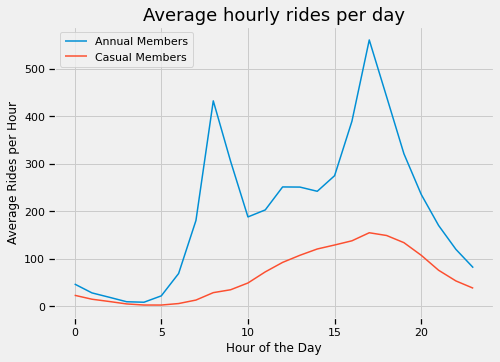

In [155]:
plt.figure(figsize=(7, 5))
plt.title('Average hourly rides per day', fontsize=18)
dx1=sns.lineplot(data=trips_data_hour, x='time', y="annual_members",label='Annual Members')
dx2=sns.lineplot(data=trips_data_hour, x='time', y="casual_members",label='Casual Members')
dx1.set_xlabel('Hour of the Day',fontsize=12)
dx1.set_ylabel('Average Rides per Hour',fontsize=12)
plt.show()

This graph clearly indicated 2 peak time for annual m embers at Hour 8 and Hour 17, aligning with rush hour times and matches with the expectation that most annual members are utilziing bike share service for the purpose of commuting to and from work.  

On the contrary, there is a lack of a significant peak hour for casual members aside from the gradual increase between Hour 12 and Hour 19 which suggests a more evenly spread out use such as for leisure or a specific purpose that is not time dependant. 

## General Analysis with Weather factors 
To further examine ridership type behaviours, weather factors are included

## Weather data 
First checking whether there are any null values in the Weather column 

In [156]:
trips_data.isnull().sum(axis=0).to_frame('count')

,count
Unnamed: 0,0
Trip Id,0
Subscription Id,1840078
Trip Duration,0
Start Station Id,0
Start Time,0
Start Station Name,0
End Station Id,0
End Time,0
End Station Name,0


## Clear vs Precipitation

In [157]:
trips_data.groupby('Weather')['Trip Id'].count().sort_values(ascending=False)

Weather
Rain                               204564
Fog                                134632
Snow                               107377
Rain,Fog                            56396
Haze                                31472
Thunderstorms,Rain                   7768
Moderate Rain                        7247
Moderate Rain,Fog                    5962
Thunderstorms,Heavy Rain,Fog         4110
Thunderstorms                        4095
Thunderstorms,Moderate Rain          3399
Rain,Snow                            2503
Heavy Rain,Fog                       1752
Thunderstorms,Fog                    1403
Freezing Rain,Fog                    1064
Moderate Snow                         398
Thunderstorms,Heavy Rain              324
Freezing Rain,Snow                    251
Heavy Snow                            203
Freezing Rain                         196
Snow,Blowing Snow                     109
Thunderstorms,Moderate Rain,Fog        88
Haze,Blowing Snow                      82
Thunderstorms,Rain,Fog    

From above since there are no clear indication, the assumption is that for the null values in weather those will be clear

The dataset will be grouped into hourly breakdown with ridership type, max temperature and weather condition 

In [158]:
trips_data_w= trips_data
trips_data_w['Weather'].fillna('clearday', inplace=True)

trips_data_w=trips_data_w.groupby([pd.Grouper(key='Start Time', freq='D')]).agg(
    rides=pd.NamedAgg(column='User Type', aggfunc=lambda x: (x.count())),
    annual_members = pd.NamedAgg(column='User Type', aggfunc=lambda x: (x[x=='Annual Member'].count())),
    casual_members = pd.NamedAgg(column='User Type', aggfunc=lambda x: (x[x=='Casual Member'].count())),
    weather_count= pd.NamedAgg(column='Weather', aggfunc=lambda x: (x.count())),
    weather_rain_count = pd.NamedAgg(column='Weather', aggfunc=lambda x: (x[x=='clearday'].count()))
)
trips_data_w['rides'] = trips_data_w['rides'].astype('Int64')
trips_data_w['annual_members'] = trips_data_w['annual_members'].astype('Int64')
trips_data_w['casual_members'] = trips_data_w['casual_members'].astype('Int64')
trips_data_w['weather_per']= trips_data_w[['weather_rain_count']].div(trips_data_w.weather_count,axis=0)
trips_data_w['weather_per']=trips_data_w['weather_per']*100
trips_data_w['weather']= np.where(trips_data_w['weather_per']>= 50.0 , 'Clear', 'Precipitation')
trips_data_w = trips_data_w[['rides','annual_members','casual_members','weather']]

# View DataFrame
trips_data_w.head(10)

,rides,annual_members,casual_members,weather
Start Time,,,,
2018-01-01 00:00:00-05:00,243,235,8,Clear
2018-01-02 00:00:00-05:00,953,934,19,Clear
2018-01-03 00:00:00-05:00,1181,1166,15,Precipitation
2018-01-04 00:00:00-05:00,1169,1153,16,Clear
2018-01-05 00:00:00-05:00,783,773,10,Clear
2018-01-06 00:00:00-05:00,398,390,8,Clear
2018-01-07 00:00:00-05:00,524,514,10,Clear
2018-01-08 00:00:00-05:00,1013,998,15,Clear
2018-01-09 00:00:00-05:00,1890,1841,49,Clear


Dropping off any time where rides is 0 and NA

In [159]:
trips_data_w_d =trips_data_w[(trips_data_w[['rides']] != 0).all(axis=1)]
trips_data_w_d=trips_data_w_d.dropna()
trips_data_w_d.head(10)

,rides,annual_members,casual_members,weather
Start Time,,,,
2018-01-01 00:00:00-05:00,243,235,8,Clear
2018-01-02 00:00:00-05:00,953,934,19,Clear
2018-01-03 00:00:00-05:00,1181,1166,15,Precipitation
2018-01-04 00:00:00-05:00,1169,1153,16,Clear
2018-01-05 00:00:00-05:00,783,773,10,Clear
2018-01-06 00:00:00-05:00,398,390,8,Clear
2018-01-07 00:00:00-05:00,524,514,10,Clear
2018-01-08 00:00:00-05:00,1013,998,15,Clear
2018-01-09 00:00:00-05:00,1890,1841,49,Clear


## Plotting Visual Representation

First a box plot is used to compare behaviour changes due to weather conditions for all riders

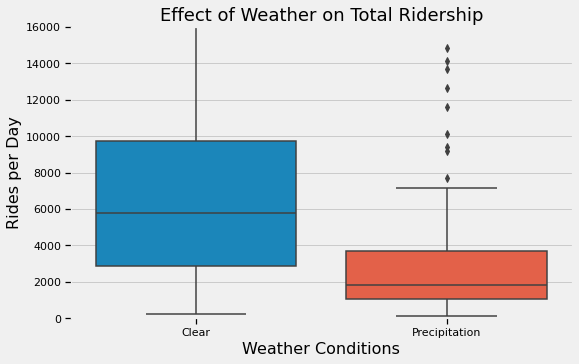

In [160]:
plt.figure(figsize=(8, 5))
plt.title('Effect of Weather on Total Ridership', fontsize=18)
trips_data_w_d['rides']=trips_data_w_d['rides'].astype('float64')
ex = sns.boxplot(x="weather", y="rides", data=trips_data_w_d)
ex.set_ylim(0,16000)
ex.set_xlabel('Weather Conditions',fontsize=16)
ex.set_ylabel('Rides per Day',fontsize=16)
plt.show()

Adding a violin plot 

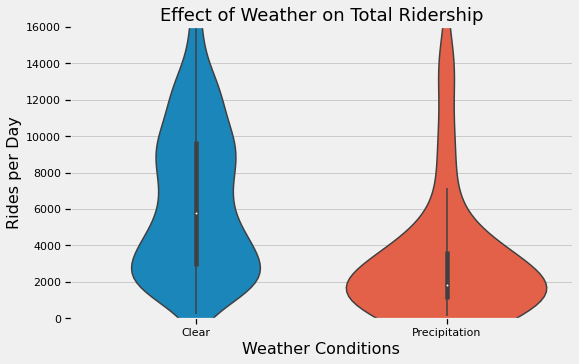

In [161]:
plt.figure(figsize=(8, 5))
plt.title('Effect of Weather on Total Ridership', fontsize=18)
trips_data_w_d['rides']=trips_data_w_d['rides'].astype('float64')
fx = sns.violinplot(x="weather", y="rides", data=trips_data_w_d)
fx.set_ylim(0,16000)
fx.set_xlabel('Weather Conditions',fontsize=16)
fx.set_ylabel('Rides per Day',fontsize=16)
plt.show()

From a total ridership perspective, it is evident that when the weather is clear, there is a more even distribution of riders per day ranging from 2000 to 10,000. Whereas when there is precipitation, the probability of having a higher ridership per day sigifnicantly decreased and that the probability of low ridership per day (in this case around 2000 riders) is the highest by a significant margin as well. 

To further explore this, annual vs casual members are examined individually 

Annual members are first looked at using both box plot and violin plot

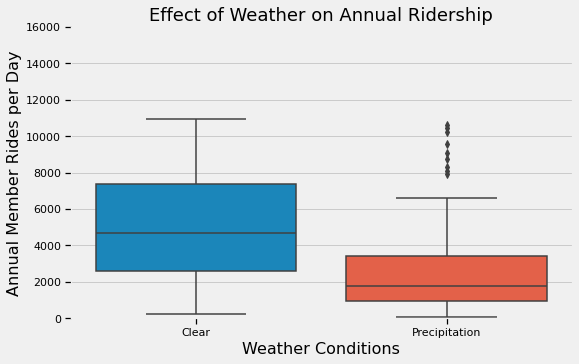

In [162]:
plt.figure(figsize=(8, 5))
plt.title('Effect of Weather on Annual Ridership', fontsize=18)
trips_data_w_d['annual_members']=trips_data_w_d['annual_members'].astype('float64')
gx = sns.boxplot(x="weather", y="annual_members", data=trips_data_w_d)
gx.set_ylim(0,16000)
gx.set_xlabel('Weather Conditions',fontsize=16)
gx.set_ylabel('Annual Member Rides per Day',fontsize=16)
plt.show()

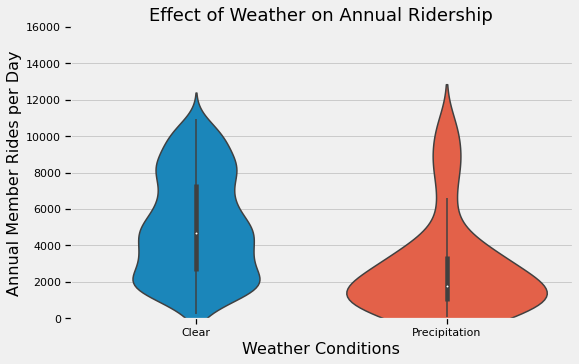

In [163]:
plt.figure(figsize=(8, 5))
plt.title('Effect of Weather on Annual Ridership', fontsize=18)
hx = sns.violinplot(x="weather", y="annual_members", data=trips_data_w_d)
hx.set_ylim(0,16000)
hx.set_xlabel('Weather Conditions',fontsize=16)
hx.set_ylabel('Annual Member Rides per Day',fontsize=16)
plt.show()

Now repeat this exercise for casual members

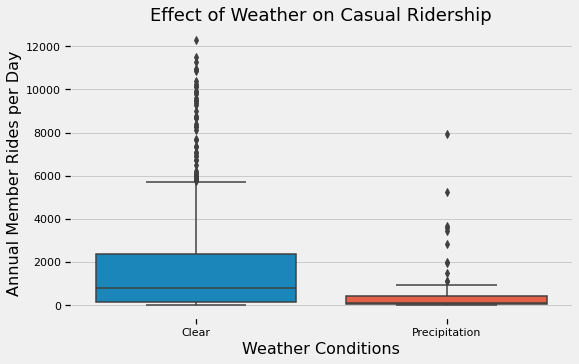

In [164]:
plt.figure(figsize=(8, 5))
plt.title('Effect of Weather on Casual Ridership', fontsize=18)
trips_data_w_d['casual_members']=trips_data_w_d['casual_members'].astype('float64')
ix = sns.boxplot(x="weather", y="casual_members", data=trips_data_w_d)
ix.set_xlabel('Weather Conditions',fontsize=16)
ix.set_ylabel('Annual Member Rides per Day',fontsize=16)
plt.show()

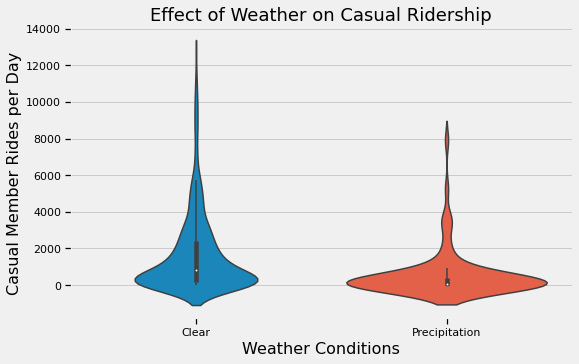

In [165]:
plt.figure(figsize=(8, 5))
plt.title('Effect of Weather on Casual Ridership', fontsize=18)
trips_data_w_d['casual_members']=trips_data_w_d['casual_members'].astype('float64')
jx = sns.violinplot(x="weather", y="casual_members", data=trips_data_w_d)
jx.set_xlabel('Weather Conditions',fontsize=16)
jx.set_ylabel('Casual Member Rides per Day',fontsize=16)
plt.show()

Based on the boxplot and the violin plot above, it is evident that weather does have a significant impact on the probability of ridership per day for both casual and annual members. 

Comparing the two types of riders, casual members are more impacted by weather conditions than annual members, especially the range of the probability of of ridership where with clear sky the probability ranges to 13,000 riders, and for precipitation days the range decreased to 9,000 per day. However, the probability range for annual members did not vary much, suggesting that there is a higher group of riders with annual members are not impacted by precipitation.  

## Other Weather Factors influencing Ridership 
In this section, in addition to precipitation, other weather factors are explored to determine its impact on ridership

### Data Grouping
To explore additional factors, a new dataframe is used to incorporate max temperature, min temperature, average relative humidity, and mwean wind speed on a daily basis. 

In [166]:
trips_data_wa= trips_data

trips_data_wa=trips_data_wa.groupby([pd.Grouper(key='Start Time', freq='D')]).agg(
    rides=pd.NamedAgg(column='User Type', aggfunc=lambda x: (x.count())),
    annual_members = pd.NamedAgg(column='User Type', aggfunc=lambda x: (x[x=='Annual Member'].count())),
    casual_members = pd.NamedAgg(column='User Type', aggfunc=lambda x: (x[x=='Casual Member'].count())),
    max_temp = pd.NamedAgg(column='Temp (°C)', aggfunc=lambda x: (x.max())),
    min_temp = pd.NamedAgg(column='Temp (°C)', aggfunc=lambda x: (x.min())),    
    rel_hum= pd.NamedAgg(column='Rel Hum (%)', aggfunc=lambda x: (x.mean())),
    wind_speed= pd.NamedAgg(column='Wind Spd (km/h)', aggfunc=lambda x: (x.mean())),
)
trips_data_wa['rides'] = trips_data_wa['rides'].astype('Int64')
trips_data_wa['annual_members'] = trips_data_wa['annual_members'].astype('Int64')
trips_data_wa['casual_members'] = trips_data_wa['casual_members'].astype('Int64')
trips_data_wa['max temperature'] = trips_data_wa['max_temp']
trips_data_wa['min temperature'] = trips_data_wa['min_temp']
trips_data_wa['average relative humidity'] = trips_data_wa['rel_hum']
trips_data_wa['average wind speed'] = trips_data_wa['wind_speed']
trips_data_wa = trips_data_wa[['rides','annual_members','casual_members','max temperature','min temperature','average relative humidity','average wind speed']]

# View DataFrame
trips_data_wa.head(10)

,rides,annual_members,casual_members,max temperature,min temperature,average relative humidity,average wind speed
Start Time,,,,,,,
2018-01-01 00:00:00-05:00,243,235,8,-8.0,-17.9,64.226337,24.152263
2018-01-02 00:00:00-05:00,953,934,19,-6.6,-13.3,73.600210,40.710388
2018-01-03 00:00:00-05:00,1181,1166,15,-5.0,-10.1,68.174428,34.339543
2018-01-04 00:00:00-05:00,1169,1153,16,-7.6,-18.7,62.354149,26.723695
2018-01-05 00:00:00-05:00,783,773,10,-15.2,-20.4,57.383142,23.342273
2018-01-06 00:00:00-05:00,398,390,8,-15.4,-21.9,56.402010,16.979899
2018-01-07 00:00:00-05:00,524,514,10,-1.2,-17.2,67.971374,41.295802
2018-01-08 00:00:00-05:00,1013,998,15,2.7,-1.2,83.671273,27.072063
2018-01-09 00:00:00-05:00,1890,1841,49,1.6,-1.0,66.428571,15.307407


As well as droping any 0 ridership data and NA 

In [167]:
trips_data_wa_d=trips_data_wa[(trips_data_w[['rides']] != 0).all(axis=1)]
trips_data_wa_d = trips_data_wa_d.dropna()
trips_data_wa_d.head()

,rides,annual_members,casual_members,max temperature,min temperature,average relative humidity,average wind speed
Start Time,,,,,,,
2018-01-01 00:00:00-05:00,243,235,8,-8.0,-17.9,64.226337,24.152263
2018-01-02 00:00:00-05:00,953,934,19,-6.6,-13.3,73.600210,40.710388
2018-01-03 00:00:00-05:00,1181,1166,15,-5.0,-10.1,68.174428,34.339543
2018-01-04 00:00:00-05:00,1169,1153,16,-7.6,-18.7,62.354149,26.723695
2018-01-05 00:00:00-05:00,783,773,10,-15.2,-20.4,57.383142,23.342273


### Temperature influence 
Now we can take a look at temperature influence on ridership through joint plot
First looking at max temperature 

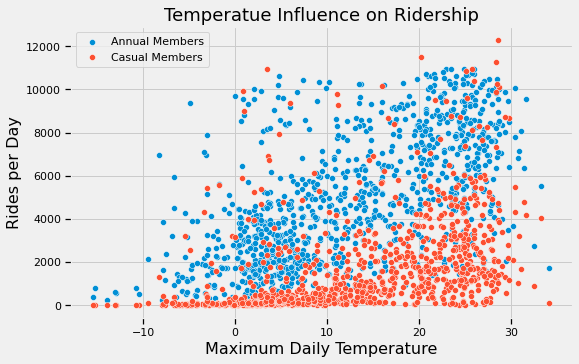

In [168]:
plt.figure(figsize=(8, 5))
plt.title('Minimum Temperatue Influence on Ridership', fontsize=18)
kxma1= sns.scatterplot(data=trips_data_wa_d, x="max temperature", y="annual_members",label='Annual Members')
kxma2= sns.scatterplot(data=trips_data_wa_d, x="max temperature", y="casual_members",label='Casual Members')
plt.legend()
kxma1.set_xlabel('Maximum Daily Temperature',fontsize=16)
kxma2.set_ylabel('Rides per Day',fontsize=16)
plt.show()

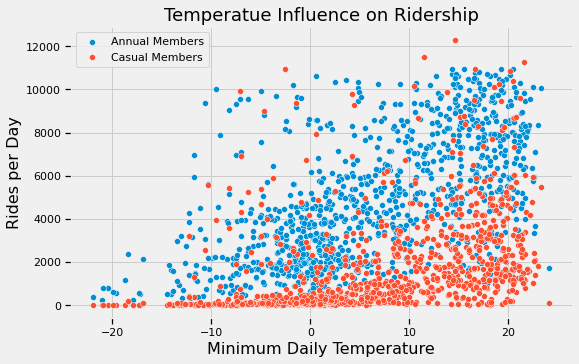

In [169]:
plt.figure(figsize=(8, 5))
plt.title('Maximum Temperatue Influence on Ridership', fontsize=18)
kxmi1= sns.scatterplot(data=trips_data_wa_d, x="min temperature", y="annual_members",label='Annual Members')
kxmi2= sns.scatterplot(data=trips_data_wa_d, x="min temperature", y="casual_members",label='Casual Members')
plt.legend()
kxmi1.set_xlabel('Minimum Daily Temperature',fontsize=16)
kxmi2.set_ylabel('Rides per Day',fontsize=16)
plt.show()

### Relative Humidity influence 
After temperature, relative humidity is examined using scatter plot

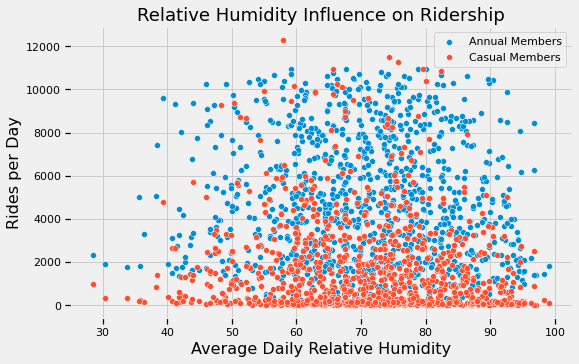

In [170]:
plt.figure(figsize=(8, 5))
plt.title('Relative Humidity Influence on Ridership', fontsize=18)
lx1= sns.scatterplot(data=trips_data_wa_d, x="average relative humidity", y="annual_members",label='Annual Members')
lx2= sns.scatterplot(data=trips_data_wa_d, x="average relative humidity", y="casual_members",label='Casual Members')
plt.legend()
lx1.set_xlabel('Average Daily Relative Humidity',fontsize=16)
lx1.set_ylabel('Rides per Day',fontsize=16)
plt.show()

### Wind Speed influence 
Lastly, max wind speed per day is also examined:

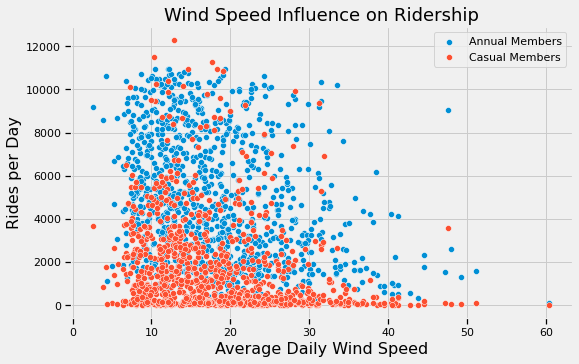

In [171]:
plt.figure(figsize=(8, 5))
plt.title('Wind Speed Influence on Ridership', fontsize=18)
mx1= sns.scatterplot(data=trips_data_wa_d, x="average wind speed", y="annual_members",label='Annual Members')
mx2= sns.scatterplot(data=trips_data_wa_d, x="average wind speed", y="casual_members",label='Casual Members')
plt.legend()
mx1.set_xlabel('Average Daily Wind Speed',fontsize=16)
mx1.set_ylabel('Rides per Day',fontsize=16)
plt.show()

From the above scatter plots we can see that both temperature (whether max vs min ) and average wind speed has a significant impact on daily ridership foor both annual and casual members. Where with a higher temperature there will be more ridership, and on colder days the number of riders reduced. This is also evident for wind speed where with higher wind speed it may be more difficult to ride outside comparing with low wind speed.

On the contrary, relative humidity does not have a significant impact on ridership for both user groups which aligns with the expectation that bike riders are not concerned with relative humidity, only precipitation. 

# Pandemic Influence Analysis 
This session will examine whether the pandemic has influence bike sharing behaviour

## Import COVID Data from CIty of Toronto Database

In [172]:
pandemic_data = pd.read_csv('COVID19 cases Toronto.csv')
pandemic_data.head()

,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,461196,1,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-22,2020-01-23,FEMALE,RESOLVED,No,No,No,No,No,No
1,461197,2,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-21,2020-01-23,MALE,RESOLVED,No,No,No,Yes,No,No
2,461198,3,Sporadic,20 to 29 Years,Parkwoods-Donalda,M3A,Travel,CONFIRMED,2020-02-05,2020-02-21,FEMALE,RESOLVED,No,No,No,No,No,No
3,461199,4,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-16,2020-02-25,FEMALE,RESOLVED,No,No,No,No,No,No
4,461200,5,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-20,2020-02-26,MALE,RESOLVED,No,No,No,No,No,No


In [173]:
pandemic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100463 entries, 0 to 100462
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   _id                     100463 non-null  int64 
 1   Assigned_ID             100463 non-null  int64 
 2   Outbreak Associated     100463 non-null  object
 3   Age Group               100393 non-null  object
 4   Neighbourhood Name      98734 non-null   object
 5   FSA                     99314 non-null   object
 6   Source of Infection     100463 non-null  object
 7   Classification          100463 non-null  object
 8   Episode Date            100463 non-null  object
 9   Reported Date           100463 non-null  object
 10  Client Gender           100463 non-null  object
 11  Outcome                 100463 non-null  object
 12  Currently Hospitalized  100463 non-null  object
 13  Currently in ICU        100463 non-null  object
 14  Currently Intubated     100463 non-n

We will be using episode data as our date for comparison, but we need to convert to datetime first and localize 

In [174]:
pandemic_data['Episode Date'] = pd.DatetimeIndex(pandemic_data['Episode Date']).tz_localize(tz = 'UTC').tz_convert(tz = 'EST')

In [175]:
pandemic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100463 entries, 0 to 100462
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   _id                     100463 non-null  int64              
 1   Assigned_ID             100463 non-null  int64              
 2   Outbreak Associated     100463 non-null  object             
 3   Age Group               100393 non-null  object             
 4   Neighbourhood Name      98734 non-null   object             
 5   FSA                     99314 non-null   object             
 6   Source of Infection     100463 non-null  object             
 7   Classification          100463 non-null  object             
 8   Episode Date            100463 non-null  datetime64[ns, EST]
 9   Reported Date           100463 non-null  object             
 10  Client Gender           100463 non-null  object             
 11  Outcome                 10

Checking NA values 

In [185]:
pandemic_data.isnull().sum(axis=0).to_frame('count')

,count
_id,0
Assigned_ID,0
Outbreak Associated,0
Age Group,70
Neighbourhood Name,1729
FSA,1149
Source of Infection,0
Classification,0
Episode Date,0
Reported Date,0


Now grouping the data, but before doing so let's examine what frequency is best using the bike share data first

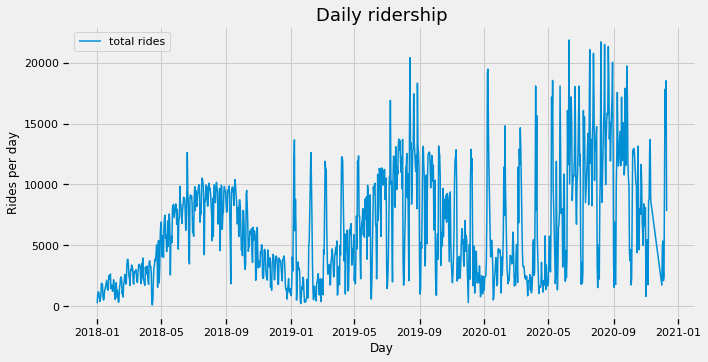

In [220]:
# Using the above trips_data_day dataframe to evaluate trips data on a frequency of days
plt.figure(figsize=(10, 5))
plt.title('Daily ridership', fontsize=18)
rdx=sns.lineplot(data=trips_data_day, x='Start Time', y="rides",label='total rides')
rdx.set_xlabel('Day',fontsize=12)
rdx.set_ylabel('Rides per day',fontsize=12)
plt.show()

The above graph seems crowded with too many data points, thus a monthly frequency is adopted

In [222]:
trips_data_month = trips_data
trips_data_month=trips_data_month.groupby([pd.Grouper(key='Start Time', freq='M')]).agg(
    rides=pd.NamedAgg(column='User Type', aggfunc=lambda x: (x.count())),
    annual_members = pd.NamedAgg(column='User Type', aggfunc=lambda x: (x[x=='Annual Member'].count())),
    casual_members = pd.NamedAgg(column='User Type', aggfunc=lambda x: (x[x=='Casual Member'].count())))

trips_data_month['rides'] = trips_data_month['rides'].astype('Int64')
trips_data_month['annual_members'] = trips_data_month['annual_members'].astype('Int64')
trips_data_month['casual_members'] = trips_data_month['casual_members'].astype('Int64')
trips_data_month.head(13)

,rides,annual_members,casual_members
Start Time,,,
2018-01-31 00:00:00-05:00,43556,42373,1183
2018-02-28 00:00:00-05:00,49099,47124,1975
2018-03-31 00:00:00-05:00,83494,78304,5190
2018-04-30 00:00:00-05:00,91183,81684,9499
2018-05-31 00:00:00-05:00,197652,159360,38292
2018-06-30 00:00:00-05:00,235862,184480,51382
2018-07-31 00:00:00-05:00,270033,212149,57884
2018-08-31 00:00:00-05:00,266038,206549,59489
2018-09-30 00:00:00-05:00,244404,204547,39857


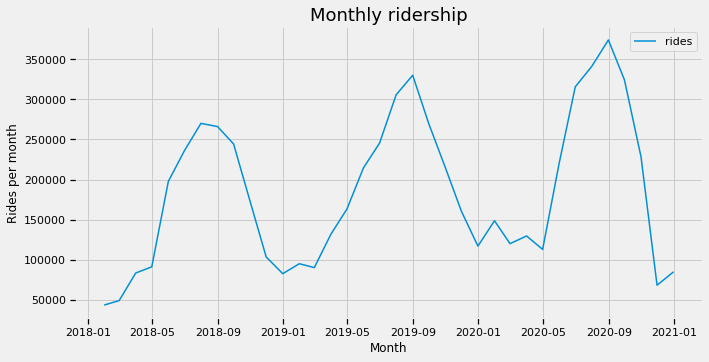

In [223]:
plt.figure(figsize=(10, 5))
plt.title('Monthly ridership', fontsize=18)
rmx=sns.lineplot(data=trips_data_month, x='Start Time', y="rides",label='rides')
rmx.set_xlabel('Month',fontsize=12)
rmx.set_ylabel('Rides per month',fontsize=12)
plt.show()

This is more clear, therefore pandemic data will also be using a frequency of month

In [188]:
pandemic_data_month = pandemic_data
pandemic_data_month=pandemic_data_month.groupby([pd.Grouper(key='Episode Date', freq='M')]).agg(
    cases=pd.NamedAgg(column='Assigned_ID', aggfunc=lambda x: (x.count())))

pandemic_data_month['cases'] = pandemic_data_month['cases'].astype('Int64')
pandemic_data_month.head(10)

,cases
Episode Date,
2020-01-31 00:00:00-05:00,9
2020-02-29 00:00:00-05:00,22
2020-03-31 00:00:00-05:00,1960
2020-04-30 00:00:00-05:00,5604
2020-05-31 00:00:00-05:00,4742
2020-06-30 00:00:00-05:00,2051
2020-07-31 00:00:00-05:00,818
2020-08-31 00:00:00-05:00,914
2020-09-30 00:00:00-05:00,5352


Since there are NA in the column above, let's check our dataframe and see if indeed there are dates where no patience recorded on that day

In [189]:
pandemic_data.sort_values(by='Episode Date', ascending=True,inplace = True)
pandemic_data.head(10)

,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
85153,546349,87895,Sporadic,20 to 29 Years,Keelesdale-Eglinton West,M6N,No Information,CONFIRMED,2020-01-20 19:00:00-05:00,2021-01-28,MALE,RESOLVED,No,No,No,No,No,No
1,461197,2,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-20 19:00:00-05:00,2020-01-23,MALE,RESOLVED,No,No,No,Yes,No,No
25432,486628,26481,Sporadic,20 to 29 Years,Bay Street Corridor,M5G,Community,CONFIRMED,2020-01-21 19:00:00-05:00,2020-10-24,FEMALE,RESOLVED,No,No,No,No,No,No
84578,545774,87307,Sporadic,40 to 49 Years,West Humber-Clairville,M9V,Household Contact,CONFIRMED,2020-01-21 19:00:00-05:00,2021-01-27,FEMALE,RESOLVED,No,No,No,No,No,No
0,461196,1,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-21 19:00:00-05:00,2020-01-23,FEMALE,RESOLVED,No,No,No,No,No,No
26955,488151,28045,Sporadic,40 to 49 Years,Rosedale-Moore Park,M4T,No Information,CONFIRMED,2020-01-23 19:00:00-05:00,2020-10-26,MALE,RESOLVED,No,No,No,No,No,No
86870,548066,89638,Sporadic,70 to 79 Years,Rockcliffe-Smythe,M6N,Community,CONFIRMED,2020-01-24 19:00:00-05:00,2021-01-30,FEMALE,RESOLVED,No,No,No,No,No,No
91058,552254,94008,Sporadic,19 and younger,Wexford/Maryvale,M1R,Community,CONFIRMED,2020-01-24 19:00:00-05:00,2021-02-09,FEMALE,RESOLVED,No,No,No,No,No,No
88856,550052,91681,Sporadic,20 to 29 Years,Corso Italia-Davenport,M6E,Community,CONFIRMED,2020-01-27 19:00:00-05:00,2021-02-02,MALE,RESOLVED,No,No,No,No,No,No
2,461198,3,Sporadic,20 to 29 Years,Parkwoods-Donalda,M3A,Travel,CONFIRMED,2020-02-04 19:00:00-05:00,2020-02-21,FEMALE,RESOLVED,No,No,No,No,No,No


The above verified that there are dates without episode date, suggesting no patient has been recorded, so we will change NA to 0

In [190]:
pandemic_data_month['cases'].fillna(0, inplace=True)
pandemic_data_month.head(100)

,cases
Episode Date,
2020-01-31 00:00:00-05:00,9
2020-02-29 00:00:00-05:00,22
2020-03-31 00:00:00-05:00,1960
2020-04-30 00:00:00-05:00,5604
2020-05-31 00:00:00-05:00,4742
2020-06-30 00:00:00-05:00,2051
2020-07-31 00:00:00-05:00,818
2020-08-31 00:00:00-05:00,914
2020-09-30 00:00:00-05:00,5352


Let's take a brief look at what the pandemic looks like 

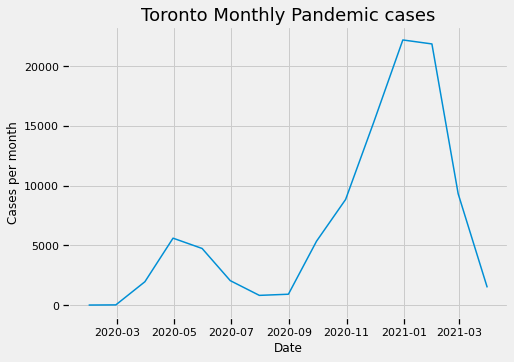

In [224]:
plt.figure(figsize=(7, 5))
plt.title('Toronto Monthly Pandemic cases', fontsize=18)
nx= sns.lineplot(data=pandemic_data_month, x='Episode Date', y="cases")
nx.set_xlabel('Date',fontsize=12)
nx.set_ylabel('Cases per month',fontsize=12)
plt.show()

## Data Merging between Bike Share Data and Toronto Pandemic Data 
In this section, we will be using the previously developed dataframe with daily ridership after 2018 and joining with Toronto Pandemic Data

In [193]:
# will be using trips_data_day dataframe developed as part of the general analysis from above 
#reset both index and create column called merge_time
trips_data_month_m=trips_data_month
trips_data_month['merge_time'] = trips_data_month.index
trips_data_month=trips_data_month.reset_index(drop=True)
pandemic_data_month_m = pandemic_data_month
pandemic_data_month_m['merge_time']= pandemic_data_month_m.index
pandemic_data_month_m=pandemic_data_month_m.reset_index(drop=True)

# merging two dataframes 
bike_pandemic_data = pd.merge(trips_data_month_m, pandemic_data_month, how ='left', on=['merge_time'])
bike_pandemic_data.fillna(0, inplace=True)

bike_pandemic_data.head()

,rides,annual_members,casual_members,merge_time,cases
0,43556,42373,1183,2018-01-31 00:00:00-05:00,0
1,49099,47124,1975,2018-02-28 00:00:00-05:00,0
2,83494,78304,5190,2018-03-31 00:00:00-05:00,0
3,91183,81684,9499,2018-04-30 00:00:00-05:00,0
4,197652,159360,38292,2018-05-31 00:00:00-05:00,0


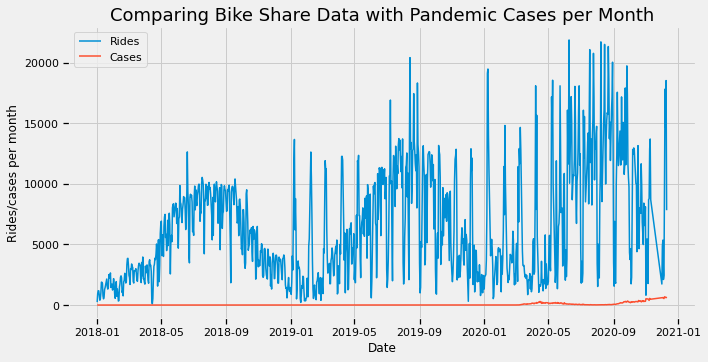

In [225]:
plt.figure(figsize=(10, 5))
plt.title('Comparing Bike Share Data with Pandemic Cases per Month', fontsize=18)
bpm=sns.lineplot(data=bike_pandemic_data, x='merge_time', y='rides', label = 'Rides')
bpm=sns.lineplot(data=bike_pandemic_data, x='merge_time', y='cases',label = 'Cases')
bpm.set_xlabel('Date',fontsize=12)
bpm.set_ylabel('Rides/cases per month',fontsize=12)
plt.show()

The above graph does not suggest much correlation regarding the impact pandemic has on ridership, however, since the data is not scaled, we will now scale the data for a better visualization

### Data Scaling

In [202]:
bike_pandemic_data_scale=bike_pandemic_data
bike_pandemic_data_scale.index= bike_pandemic_data_scale['merge_time']
bike_pandemic_data_scale=bike_pandemic_data_scale.drop(columns=['merge_time'])
bike_pandemic_data_scale.head()

,rides,annual_members,casual_members,cases
merge_time,,,,
2018-01-31 00:00:00-05:00,43556,42373,1183,0
2018-02-28 00:00:00-05:00,49099,47124,1975,0
2018-03-31 00:00:00-05:00,83494,78304,5190,0
2018-04-30 00:00:00-05:00,91183,81684,9499,0
2018-05-31 00:00:00-05:00,197652,159360,38292,0


In [227]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
bike_pandemic_data_scale_mm = bike_pandemic_data_scale
bike_pandemic_data_scale_mm[['rides', 'annual_members','casual_members','cases']] = scaler.fit_transform(bike_pandemic_data_scale_mm[['rides', 'annual_members','casual_members','cases']])
bike_pandemic_data_scale_mm.head()

,rides,annual_members,casual_members,cases
merge_time,,,,
2018-01-31 00:00:00-05:00,0.000000,0.000000,0.000000,0.0
2018-02-28 00:00:00-05:00,0.016774,0.024370,0.005824,0.0
2018-03-31 00:00:00-05:00,0.120857,0.184308,0.029463,0.0
2018-04-30 00:00:00-05:00,0.144125,0.201646,0.061147,0.0
2018-05-31 00:00:00-05:00,0.466312,0.600084,0.272860,0.0


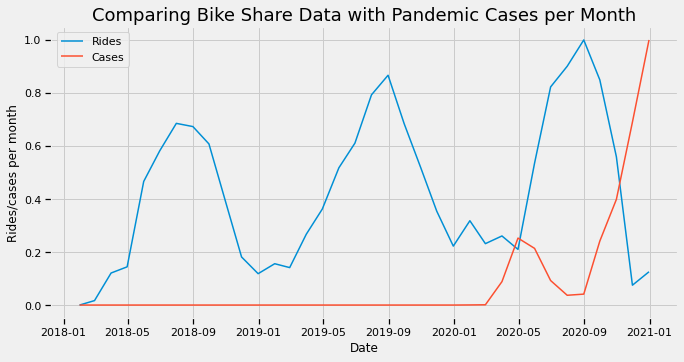

In [229]:
plt.figure(figsize=(10, 5))

plt.title('Comparing Bike Share Data with Pandemic Cases per Month', fontsize=18)
bpmmm=sns.lineplot(data=bike_pandemic_data_scale_mm, x='merge_time', y='rides', label = 'Rides')
bpmmm =sns.lineplot(data=bike_pandemic_data_scale_mm, x='merge_time', y='cases',label = 'Cases')
bpmmm.set_xlabel('Date',fontsize=12)
bpmmm.set_ylabel('Rides/cases per month',fontsize=12)
plt.show()

From the above graph, we can see that during the start of the pandemic (Between 2020 Feb to 2020 May) there is a decrease in ridership, however, after May of 2020 we can see that as the pandemic cases go down, ridership increased until 2020 September, where the second wave hit Toronto thus cases went up with a decrease in ridership. 

Ihis initial oberservation could imply that pandemic has influenced overall ridership, however, upon further examination with previous year data, we can also see that for 2018 and 2019 without pandemic, between May to September, there is an increase in ridership possibly due to summer weather conditions, this trend decreases around September due to winter conditions. 

With both factors considered we can conclude that pandemic indeed has influenced ridership, with a steeper rate of increase when pandemic rate decreased and vice versa, however, the extend of this effect can be argued as not as significant due to weather conditions influencing user behaviour.  